In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
#Link to function found in datacamp course
#https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/graphical-exploratory-data-analysis?ex=12
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [94]:
#Gets the permutation means for columns
def get_perm_means(column):
    diff = []

    for i in range(10000):
        perm = np.random.permutation(songs_df[column])
        mean_diff = np.mean(perm[songs_df['mode'] == 0]) - np.mean(perm[songs_df['mode'] == 1])
        diff.append(mean_diff)
    return diff

In [95]:
#Hypothesis testing for p values
def hypo_test(column, diff):
    pos_extreme = []
    neg_extreme = []
    major_song = song_major[column]
    minor_song = song_minor[column]
    song_obs = np.mean(major_song) - np.mean(minor_song)
    song_obs = abs(song_obs)
    

    for j in range(len(diff)):
        if(diff[j] >= song_obs):
            pos_extreme.append(diff[j])
        elif(diff[j] <= -song_obs):
            neg_extreme.append(diff[j])
    return (len(pos_extreme), len(neg_extreme))

In [109]:
songs_df = pd.read_csv('Data/songs_w_genres_df.csv', index_col='id')
songs_df.head()

,name,artists,year,explicit,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,key,speechiness,tempo,valence,genres
id,,,,,,,,,,,,,,,,,,
0cS0A1fUEUd1EW3FcF8AEI,Keep A Song In Your Soul,Mamie Smith,1920,0,12,168333,0.991000,0.598,0.224,0.000522,0.3790,-12.628,0,F,0.0936,149.976,0.6340,"['harlem renaissance', 'traditional blues']"
0hbkKFIJm7Z05H8Zl9w30f,I Put A Spell On You,Screamin' Jay Hawkins,1920,0,7,150200,0.643000,0.852,0.517,0.026400,0.0809,-7.261,0,F,0.0534,86.889,0.9500,"['blues', 'traditional blues']"
11m7laMUgmOKqI3oYzuhne,Golfing Papa,Mamie Smith,1920,0,4,163827,0.993000,0.647,0.186,0.000018,0.5190,-12.098,1,C,0.1740,97.600,0.6890,"['harlem renaissance', 'traditional blues']"
19Lc5SfJJ5O1oaxY0fpwfh,True House Music - Xavier Santos & Carlos Gomi...,Oscar Velazquez,1920,0,17,422087,0.000173,0.730,0.798,0.801000,0.1280,-7.311,1,D,0.0425,127.997,0.0422,['circuit']
2hJjbsLCytGsnAHfdsLejp,Xuniverxe,Mixe,1920,1,2,165224,0.295000,0.704,0.707,0.000246,0.4020,-6.036,0,A#,0.0768,122.076,0.2990,['glitchcore']


In [110]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174389 entries, 0cS0A1fUEUd1EW3FcF8AEI to 57tgYkWQTNHVFEt6xDKKZj
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              174389 non-null  object 
 1   artists           174389 non-null  object 
 2   year              174389 non-null  int64  
 3   explicit          174389 non-null  int64  
 4   popularity        174389 non-null  int64  
 5   duration_ms       174389 non-null  int64  
 6   acousticness      174389 non-null  float64
 7   danceability      174389 non-null  float64
 8   energy            174389 non-null  float64
 9   instrumentalness  174389 non-null  float64
 10  liveness          174389 non-null  float64
 11  loudness          174389 non-null  float64
 12  mode              174389 non-null  int64  
 13  key               174389 non-null  object 
 14  speechiness       174389 non-null  float64
 15  tempo             174389 non-null  f

In [111]:
no_genre_df = songs_df.dropna(subset=['genres'])
no_genre_df = no_genre_df[no_genre_df['genres'] != '[]']

In [112]:
no_genre_df.sort_values(by='popularity', ascending=True).head(10)

,name,artists,year,explicit,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,key,speechiness,tempo,valence,genres
id,,,,,,,,,,,,,,,,,,
2y9jSsUKlrCMPAYphaNoDt,Something Going On Wrong,Sonny Boy Williamson I,1941,0,0,190250,0.995000,0.480,0.0543,0.251000,0.1310,-20.844,1,G,0.0997,77.890,0.5710,"['acoustic blues', 'blues', 'chicago blues', '..."
0d3XPvr9Xrb8kC64zzBJnf,Someone Like You,Fred Everything,2021,0,0,349130,0.000018,0.757,0.8290,0.879000,0.4530,-10.178,0,F#,0.0499,120.003,0.3140,['deep house']
2nF6AMAAhcqQ9A6Lzd3R5u,True,Fred Everything,2021,0,0,330828,0.000221,0.617,0.9490,0.888000,0.0663,-9.297,0,D,0.0456,121.994,0.7520,['deep house']
18enZNvTk5Ks85Qyp4eHZs,Beyond the Forest Part. 3,Max Steiner,1949,0,0,320209,0.599000,0.121,0.3440,0.692000,0.1510,-10.891,1,C,0.0336,76.567,0.0917,['classic soundtrack']
19Hb2Qx1SMvTeOXCnXqMMB,Nerdesin Bilmem Ne Oldun,Safiye Ayla,1949,0,0,159681,0.995000,0.372,0.6270,0.948000,0.2170,-14.060,0,A,0.3820,77.469,0.3870,"['turkish classical', 'turkish jazz']"
1ADljX6Q1nqgJS3rJvEYLg,Kajal Kali Raatladi,Meena Kapoor,1949,0,0,167921,0.995000,0.884,0.0560,0.567000,0.1210,-12.246,0,A#,0.4380,106.596,0.7770,['classic bollywood']
1AN8e6gRDQ6dECn5engJgV,Dil Bar Bar Ghabraye,Geeta Dutt,1949,0,0,170096,0.995000,0.453,0.1090,0.414000,0.1070,-15.331,0,D#,0.0965,168.885,0.4850,"['classic bollywood', 'classic pakistani pop',..."
1Bc33rymITWntDSD2XdfhK,Aji Sambhal Ke Aana Ho Lala,Lata Mangeshkar,1949,0,0,167941,0.817000,0.748,0.3350,0.000000,0.2000,-9.007,1,E,0.0753,133.438,0.8940,"['classic bollywood', 'desi pop', 'filmi', 'su..."
1Bo8VjSzkP8qu6fJ51fErB,Piano Quartet: I. Adagio serio,Aaron Copland,1949,0,0,402373,0.917000,0.166,0.1080,0.111000,0.0844,-17.932,0,A#,0.0356,82.727,0.0375,"['american modern classical', 'classical', 'ea..."


In [113]:
songs_df.sort_values(by='popularity', ascending=False).head(10)

,name,artists,year,explicit,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,key,speechiness,tempo,valence,genres
id,,,,,,,,,,,,,,,,,,
7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,2021,1,100,242014,0.7210,0.585,0.436,0.000013,0.1050,-8.761,1,A#,0.0601,143.874,0.132,"['pop', 'post-teen pop']"
3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),"24kGoldn', 'iann dior",2020,1,96,140526,0.2210,0.700,0.722,0.000000,0.2720,-3.558,0,G,0.0369,90.989,0.756,NaN
35mvY5S1H3J2QZyna3TFe0,positions,Ariana Grande,2020,1,96,172325,0.4680,0.737,0.802,0.000000,0.0931,-4.771,1,C,0.0878,144.015,0.682,"['dance pop', 'pop', 'post-teen pop']"
47EiUVwUp4C9fGccaPuUCS,DÁKITI,"Bad Bunny', 'Jhay Cortez",2020,1,95,205090,0.4010,0.731,0.573,0.000052,0.1130,-10.059,0,E,0.0544,109.928,0.145,NaN
7vrJn5hDSXRmdXoR30KgF1,BICHOTA,KAROL G,2020,1,95,178947,0.2120,0.863,0.666,0.000493,0.1030,-4.158,0,C#,0.1520,163.908,0.838,"['latin', 'reggaeton', 'reggaeton colombiano',..."
6Im9k8u9iIzKMrmV7BWtlF,34+35,Ariana Grande,2020,1,94,173711,0.2370,0.830,0.585,0.000000,0.2480,-6.476,1,C,0.0940,109.978,0.485,"['dance pop', 'pop', 'post-teen pop']"
5vGLcdRuSbUhD8ScwsGSdA,Whoopty,CJ,2020,1,94,123429,0.1900,0.711,0.598,0.000000,0.1500,-7.621,0,D#,0.1820,140.175,0.737,[]
27OeeYzk6klgBh83TSvGMA,WITHOUT YOU,The Kid LAROI,2020,1,94,161385,0.2130,0.662,0.413,0.000000,0.1340,-7.357,1,C,0.0299,93.005,0.467,['australian hip hop']
54bFM56PmE4YLRnqpW6Tha,Therefore I Am,Billie Eilish,2020,0,94,174321,0.2180,0.889,0.340,0.130000,0.0550,-7.773,0,B,0.0697,94.009,0.716,"['electropop', 'pop']"


In [114]:
songs_df.describe()

,year,explicit,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
count,174389.000000,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,1977.061764,0.068135,25.693381,2.328100e+05,0.499228,0.536758,0.482721,0.197252,0.211123,-11.750865,0.702384,0.105729,117.006500,0.524533
std,26.907950,0.251978,21.872740,1.483958e+05,0.379936,0.176025,0.272685,0.334574,0.180493,5.691591,0.457211,0.182260,30.254178,0.264477
min,1920.000000,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,1955.000000,0.000000,1.000000,1.661330e+05,0.087700,0.414000,0.249000,0.000000,0.099200,-14.908000,0.000000,0.035200,93.931000,0.311000
50%,1977.000000,0.000000,25.000000,2.057870e+05,0.517000,0.548000,0.465000,0.000524,0.138000,-10.836000,1.000000,0.045500,115.816000,0.536000
75%,1999.000000,0.000000,42.000000,2.657200e+05,0.895000,0.669000,0.711000,0.252000,0.270000,-7.499000,1.000000,0.076300,135.011000,0.743000
max,2021.000000,1.000000,100.000000,5.338302e+06,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,1.000000,0.971000,243.507000,1.000000


In [116]:
songs_df['key'].value_counts()

C     21967
G     21363
D     18916
A     18109
F     16546
C#    13562
E     13327
A#    12406
B     11014
G#    10673
F#     9226
D#     7280
Name: key, dtype: int64

In [117]:
numerical_songs = songs_df.select_dtypes(include=['int64', 'float64'])
numerical_songs.head()

,year,explicit,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
id,,,,,,,,,,,,,,
0cS0A1fUEUd1EW3FcF8AEI,1920,0,12,168333,0.991000,0.598,0.224,0.000522,0.3790,-12.628,0,0.0936,149.976,0.6340
0hbkKFIJm7Z05H8Zl9w30f,1920,0,7,150200,0.643000,0.852,0.517,0.026400,0.0809,-7.261,0,0.0534,86.889,0.9500
11m7laMUgmOKqI3oYzuhne,1920,0,4,163827,0.993000,0.647,0.186,0.000018,0.5190,-12.098,1,0.1740,97.600,0.6890
19Lc5SfJJ5O1oaxY0fpwfh,1920,0,17,422087,0.000173,0.730,0.798,0.801000,0.1280,-7.311,1,0.0425,127.997,0.0422
2hJjbsLCytGsnAHfdsLejp,1920,1,2,165224,0.295000,0.704,0.707,0.000246,0.4020,-6.036,0,0.0768,122.076,0.2990


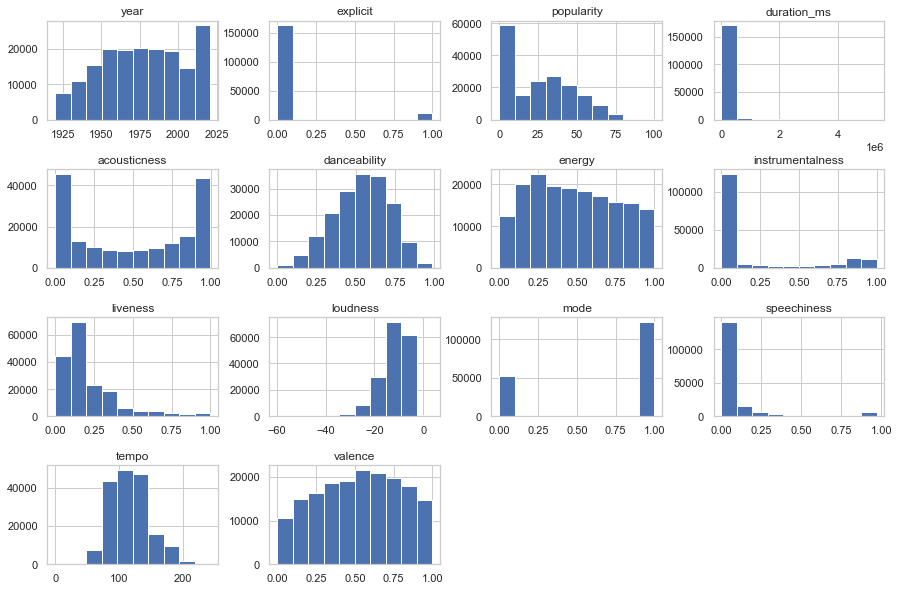

In [118]:
_ = numerical_songs.hist(figsize=(15,10))
_ = plt.subplots_adjust(hspace=0.5)
plt.show()

In [119]:
numerical_songs.groupby(by='mode').mean()

,year,explicit,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mode,,,,,,,,,,,,,
0,1979.084064,0.092330,25.436254,243490.339473,0.461504,0.549834,0.506247,0.226411,0.210658,-11.582547,0.117128,116.893193,0.51576
1,1976.204869,0.057883,25.802332,228284.538616,0.515213,0.531217,0.472752,0.184897,0.211320,-11.822185,0.100899,117.054511,0.52825


In [120]:
song_major = songs_df[songs_df['mode'] == 1]
song_minor = songs_df[songs_df['mode'] == 0]


# Acousticness

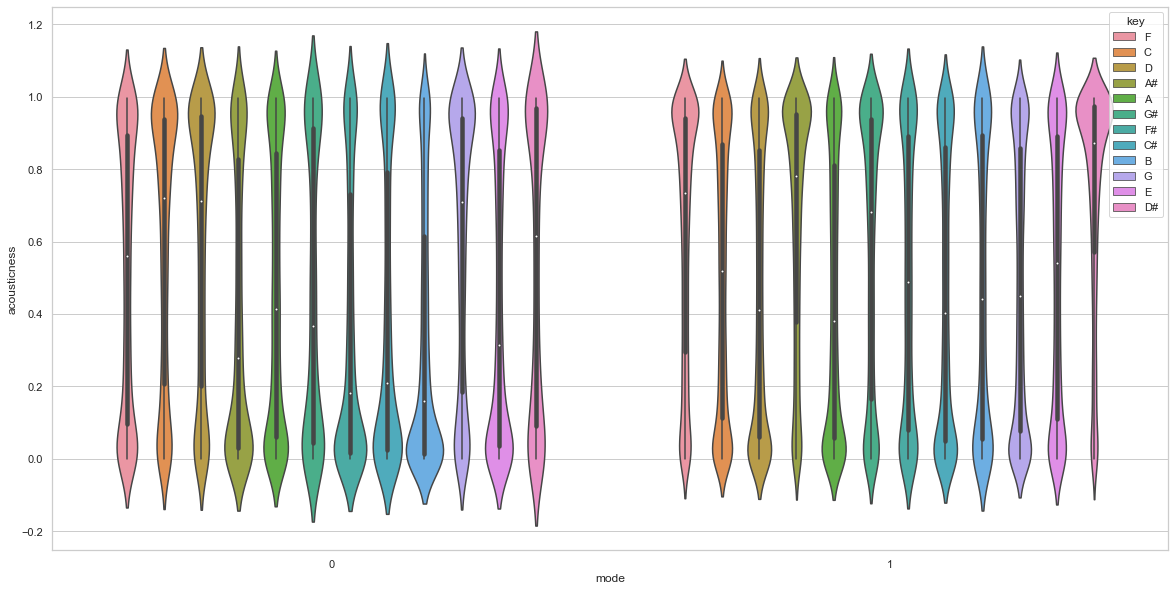

In [121]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='acousticness', hue='key', data=songs_df)

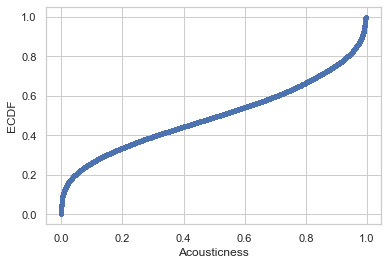

In [17]:
x_yard, y_yard = ecdf(songs_df['acousticness'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Acousticness')
_ = plt.ylabel('ECDF')

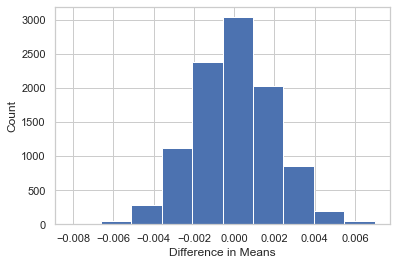

In [18]:
diff_acoustic = get_perm_means('acousticness')
_ = plt.hist(diff_acoustic)
_ = plt.xlabel('Difference in Means')
_ = plt.ylabel('Count')

In [19]:
results_acoustic = hypo_test('acousticness', diff_acoustic)
results_acoustic

(0, 0)

# Danceability

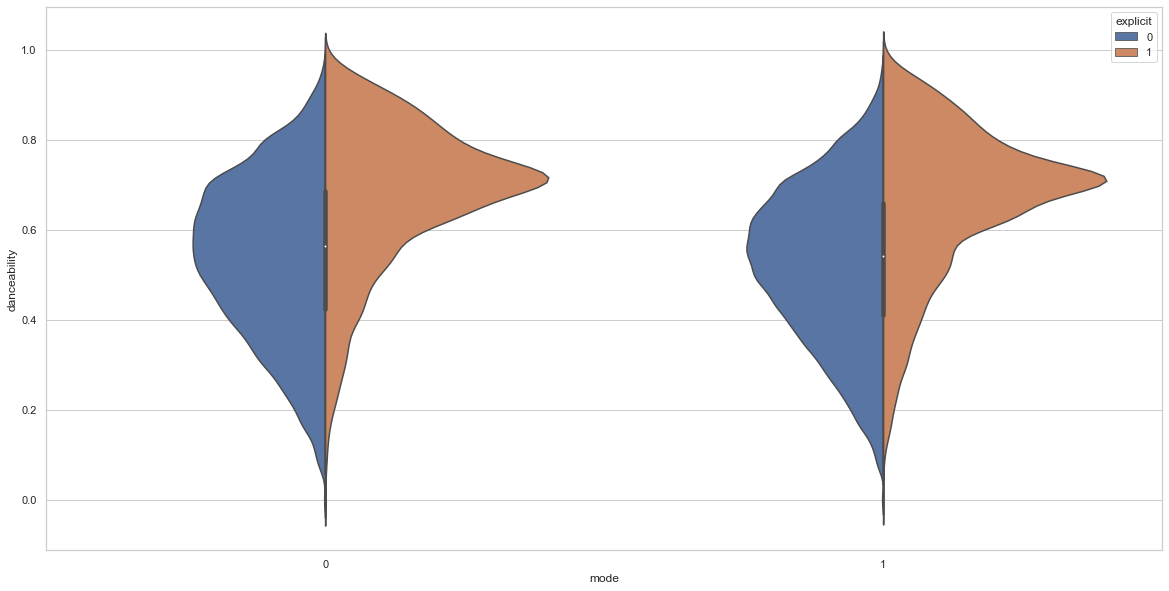

In [20]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='danceability', hue='explicit', data=songs_df, split=True)

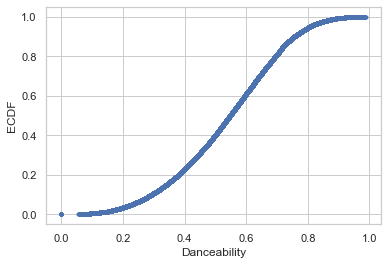

In [21]:
x_yard, y_yard = ecdf(songs_df['danceability'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Danceability')
_ = plt.ylabel('ECDF')

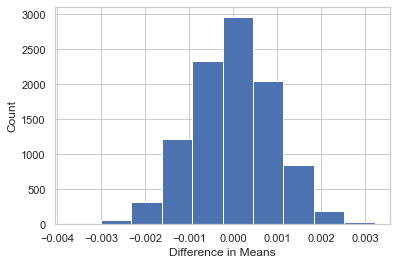

In [22]:
diff_dance = get_perm_means('danceability')
_ = plt.hist(diff_dance)
_ = plt.xlabel('Difference in Means')
_ = plt.ylabel('Count')

In [23]:
results_dance = hypo_test('danceability', diff_dance)
results_dance

(0, 0)

# Energy

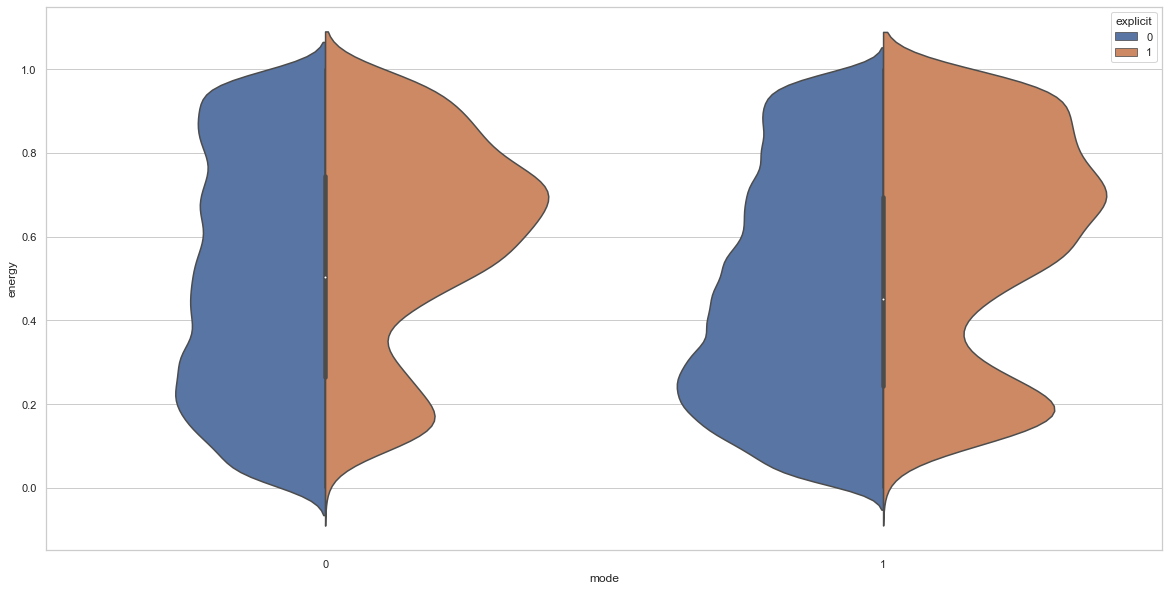

In [24]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='energy', hue='explicit', data=songs_df, split=True)

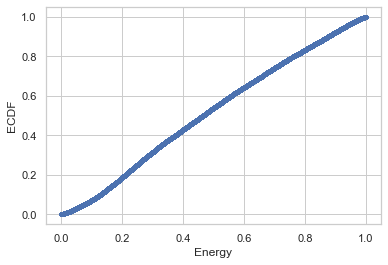

In [25]:
x_yard, y_yard = ecdf(songs_df['energy'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Energy')
_ = plt.ylabel('ECDF')

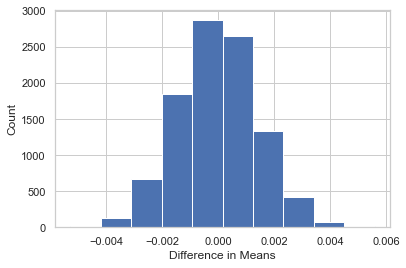

In [26]:
diff_energy = get_perm_means('energy')
_ = plt.hist(diff_energy)
_ = plt.xlabel('Difference in Means')
_ = plt.ylabel('Count')


In [27]:
results_energy = hypo_test('energy', diff_energy)
results_energy

(0, 0)

# Instrumentalness

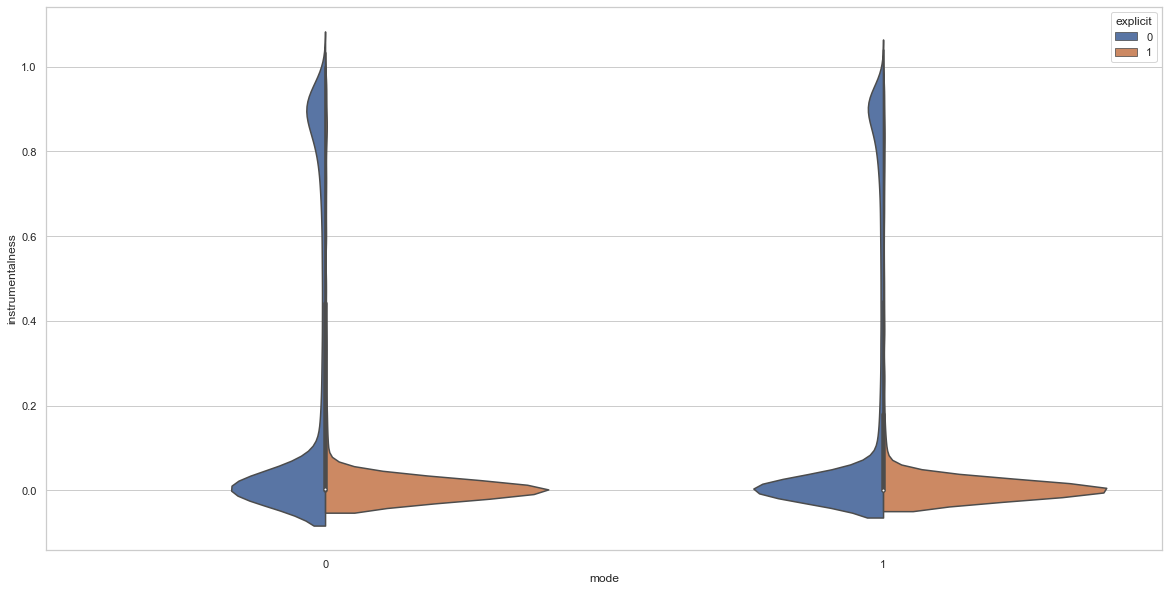

In [28]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='instrumentalness', hue='explicit', data=songs_df, split=True)

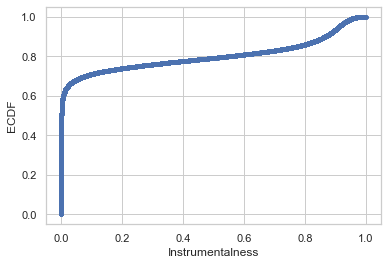

In [29]:
x_yard, y_yard = ecdf(songs_df['instrumentalness'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Instrumentalness')
_ = plt.ylabel('ECDF')

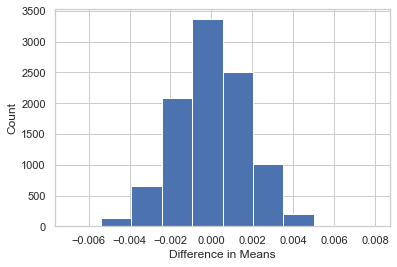

In [30]:
diff_instrument = get_perm_means('instrumentalness')
_ = plt.hist(diff_instrument)
_ = plt.xlabel('Difference in Means')
_ = plt.ylabel('Count')


In [31]:
results_instrument = hypo_test('instrumentalness', diff_instrument)
results_instrument

(0, 0)

# Loudness

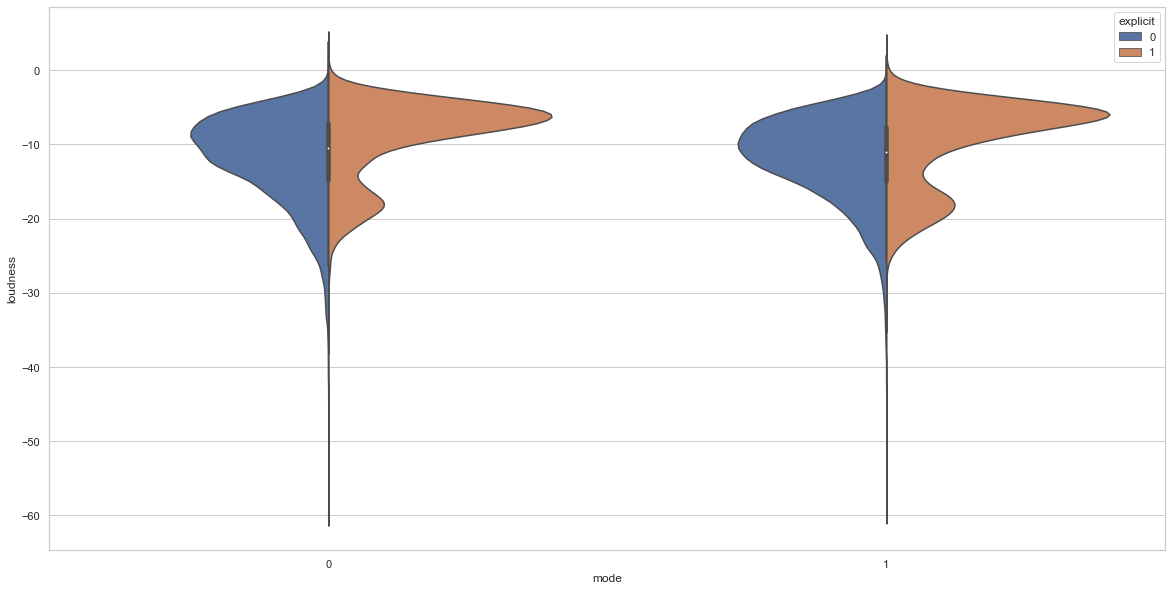

In [32]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='loudness', hue='explicit', data=songs_df, split=True)

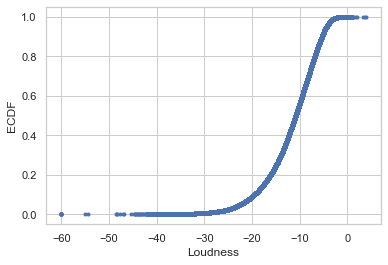

In [33]:
x_yard, y_yard = ecdf(songs_df['loudness'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Loudness')
_ = plt.ylabel('ECDF')

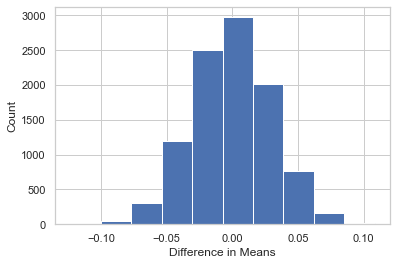

In [34]:
diff_loud = get_perm_means('loudness')
_ = plt.hist(diff_loud)
_ = plt.xlabel('Difference in Means')
_ = plt.ylabel('Count')


In [35]:
results_loud = hypo_test('loudness', diff_loud)
results_loud

(0, 0)

# Popularity

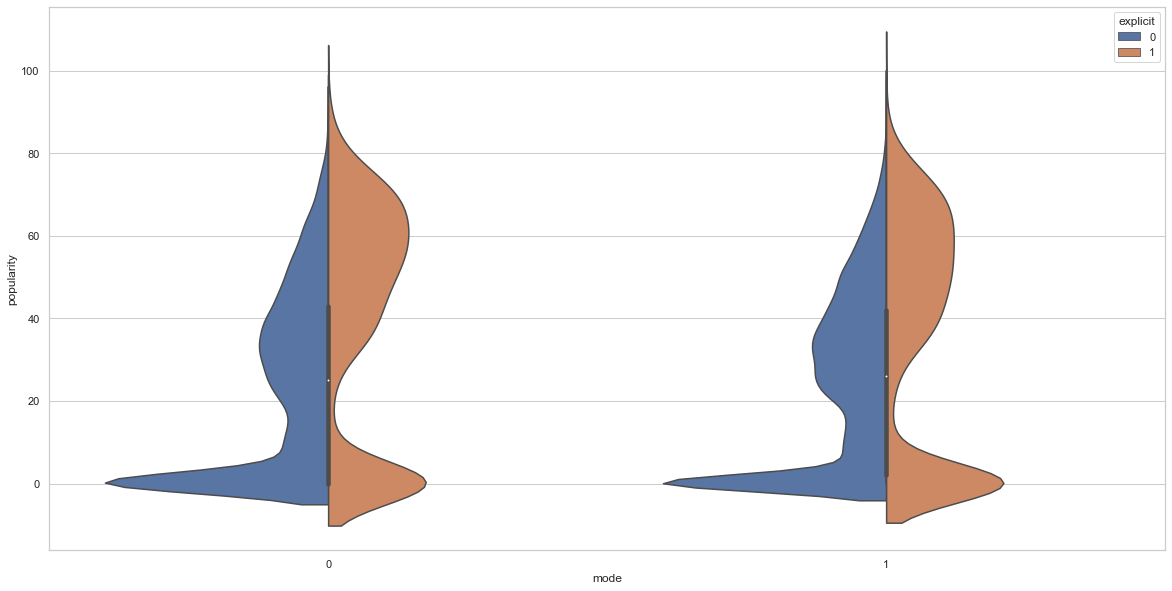

In [36]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='popularity', hue='explicit', data=songs_df, split=True)

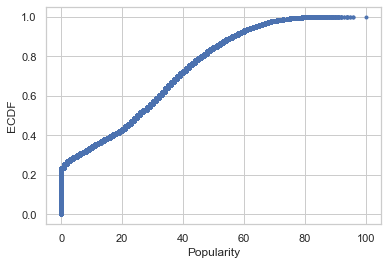

In [37]:
x_yard, y_yard = ecdf(songs_df['popularity'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Popularity')
_ = plt.ylabel('ECDF')

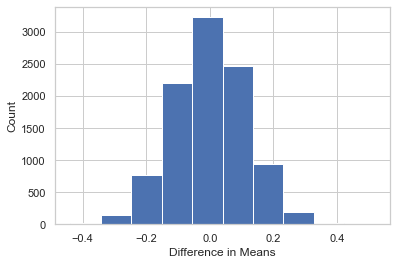

In [38]:
diff_pop = get_perm_means('popularity')
_ = plt.hist(diff_pop)
_ = plt.xlabel('Difference in Means')
_ = plt.ylabel('Count')


In [39]:
results_pop = hypo_test('popularity', diff_pop)
results_pop

(9, 11)

# Speechiness

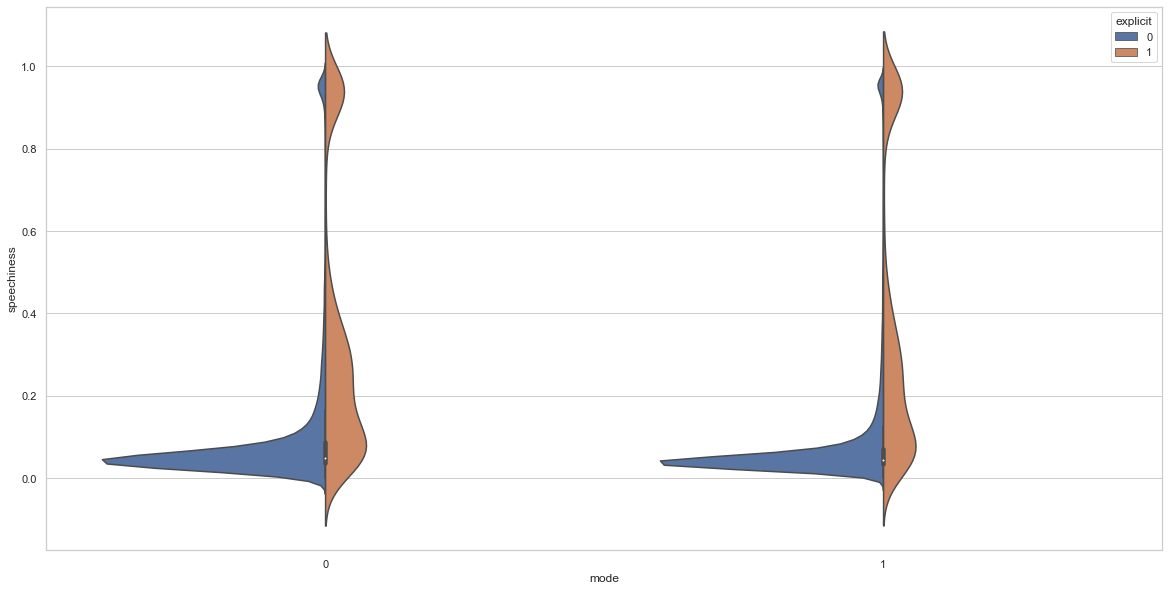

In [40]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='speechiness', hue='explicit', data=songs_df, split=True)

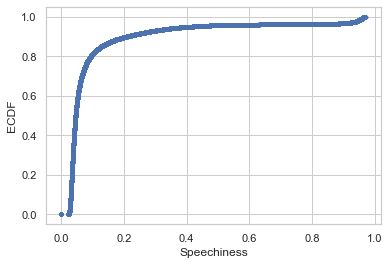

In [41]:
x_yard, y_yard = ecdf(songs_df['speechiness'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Speechiness')
_ = plt.ylabel('ECDF')

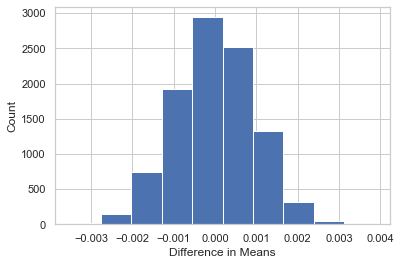

In [42]:
diff_speech = get_perm_means('speechiness')
_ = plt.hist(diff_speech)
_ = plt.xlabel('Difference in Means')
_ = plt.ylabel('Count')


In [43]:
results_speech = hypo_test('speechiness', diff_speech)
results_speech

(0, 0)

# Tempo

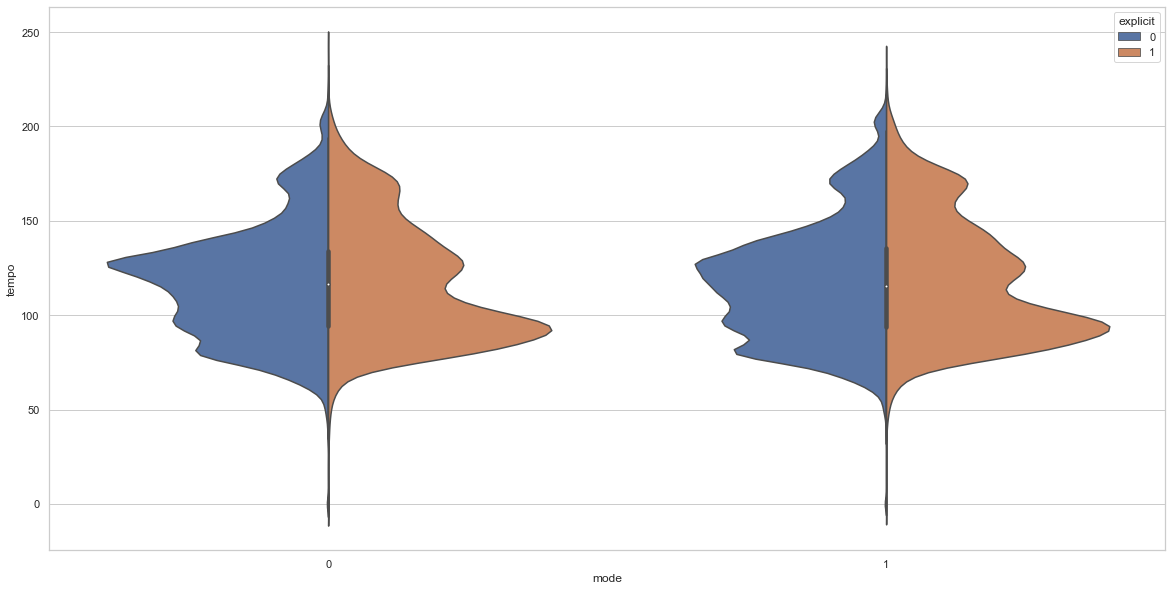

In [44]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='tempo', hue='explicit', data=songs_df, split=True)

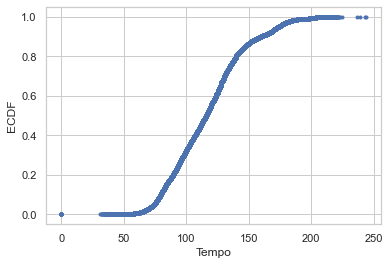

In [45]:
x_yard, y_yard = ecdf(songs_df['tempo'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Tempo')
_ = plt.ylabel('ECDF')

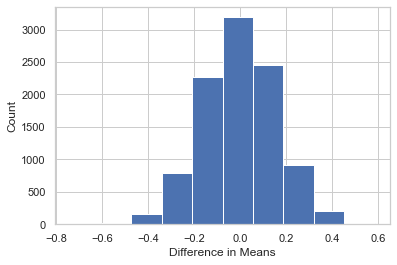

In [46]:
diff_tempo = get_perm_means('tempo')
_ = plt.hist(diff_tempo)
_ = plt.xlabel('Difference in Means')
_ = plt.ylabel('Count')


In [47]:
results_tempo = hypo_test('tempo', diff_tempo)
results_tempo

(1490, 1582)

# Valence

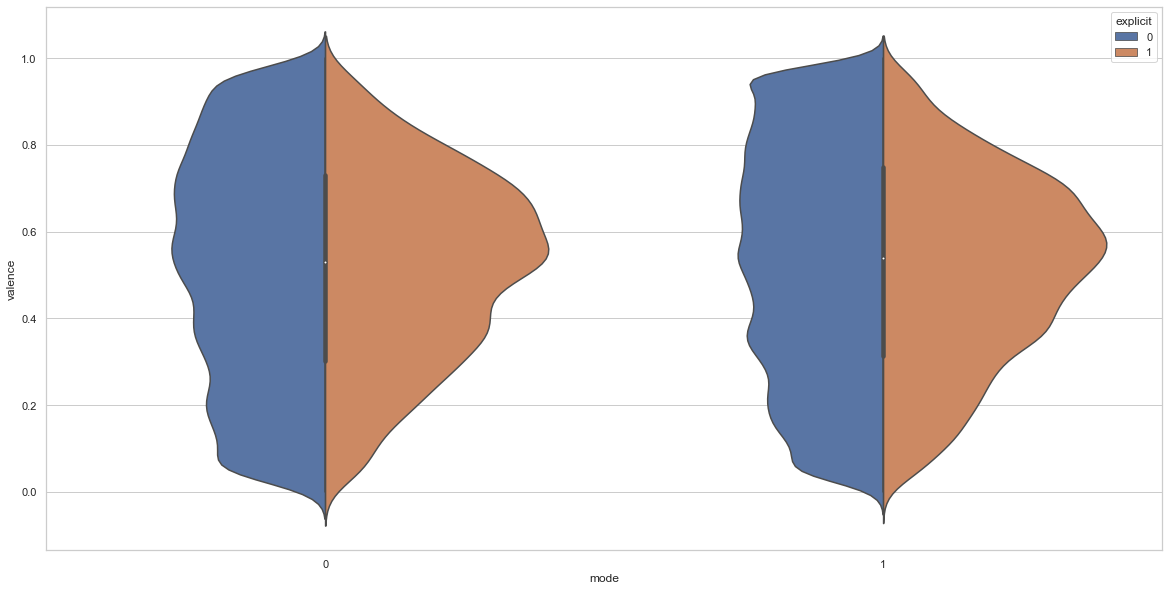

In [48]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='valence', hue='explicit', data=songs_df, split=True)

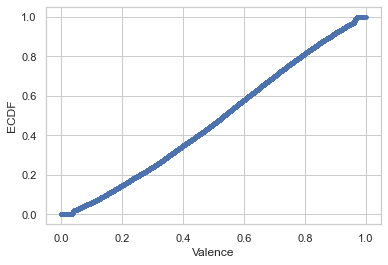

In [49]:
x_yard, y_yard = ecdf(songs_df['valence'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Valence')
_ = plt.ylabel('ECDF')

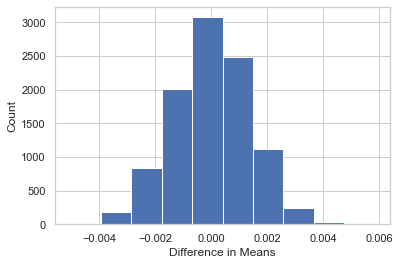

In [50]:
diff_valence = get_perm_means('valence')
_ = plt.hist(diff_valence)
_ = plt.xlabel('Difference in Means')
_ = plt.ylabel('Count')

In [51]:
results_valence = hypo_test('valence', diff_valence)
results_valence

(0, 0)

# HeatMap

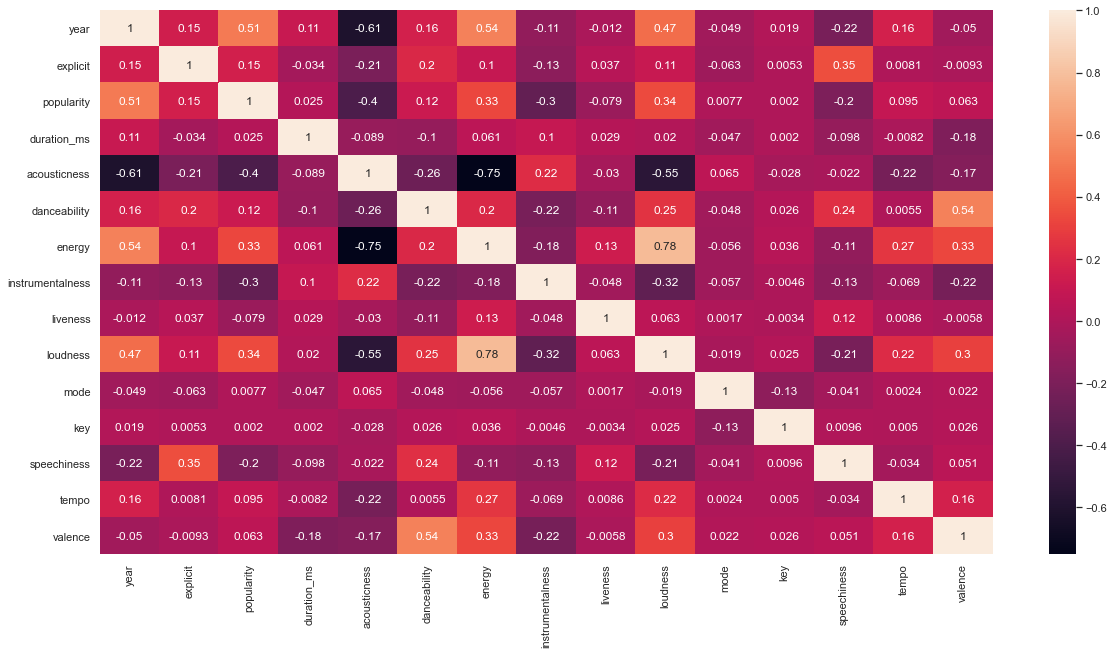

In [52]:
plt.figure(figsize=(20,10))
_ = sns.heatmap(songs_df.corr(), annot=True)

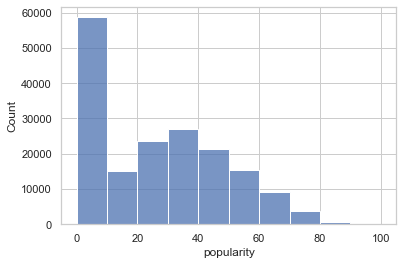

In [53]:
sns.histplot(songs_df, x='popularity', stat='count', bins=10)

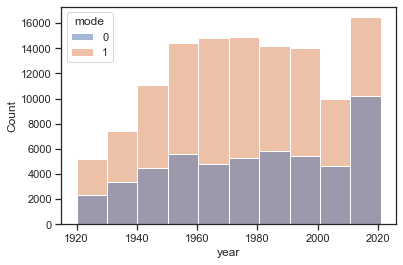

In [62]:
sns.histplot(songs_df, x='year', hue='mode', stat='count', bins=10)

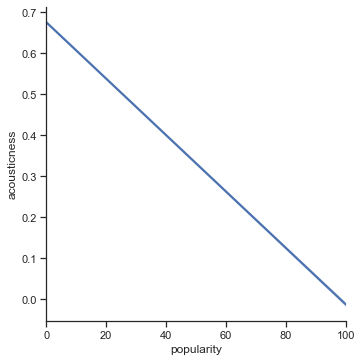

In [55]:
sns.set_theme(style='ticks')

sns.lmplot(x='popularity', y='acousticness', data=songs_df, scatter=False)

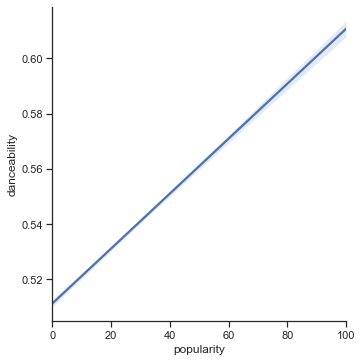

In [56]:
sns.lmplot(x='popularity', y='danceability', data=songs_df, scatter=False)

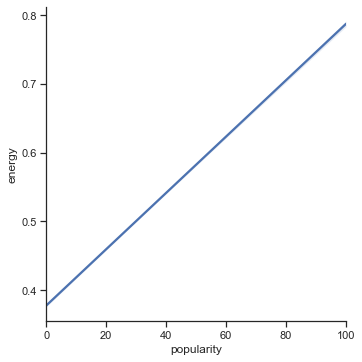

In [57]:
sns.lmplot(x='popularity', y='energy', data=songs_df, scatter=False)

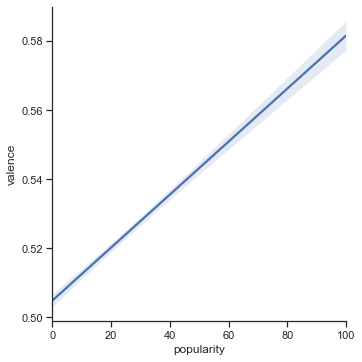

In [58]:
sns.lmplot(x='popularity', y='valence', data=songs_df, scatter=False)